In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
# Load datasets
regularSeason = pd.read_csv('2023-2024 NBA Player Stats - Regular.csv', encoding='ISO-8859-1', delimiter=';')
playoff = pd.read_csv('2023-2024 NBA Player Stats - Playoffs.csv', encoding='ISO-8859-1', delimiter=';')

In [3]:
# Display info about the datasets
regularSeason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      735 non-null    int64  
 1   Player  735 non-null    object 
 2   Pos     735 non-null    object 
 3   Age     735 non-null    int64  
 4   Tm      735 non-null    object 
 5   G       735 non-null    int64  
 6   GS      735 non-null    int64  
 7   MP      735 non-null    float64
 8   FG      735 non-null    float64
 9   FGA     735 non-null    float64
 10  FG%     735 non-null    float64
 11  3P      735 non-null    float64
 12  3PA     735 non-null    float64
 13  3P%     735 non-null    float64
 14  2P      735 non-null    float64
 15  2PA     735 non-null    float64
 16  2P%     735 non-null    float64
 17  eFG%    735 non-null    float64
 18  FT      735 non-null    float64
 19  FTA     735 non-null    float64
 20  FT%     735 non-null    float64
 21  ORB     735 non-null    float64
 22  DR

In [4]:
playoff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      213 non-null    int64  
 1   Player  213 non-null    object 
 2   Pos     213 non-null    object 
 3   Age     213 non-null    int64  
 4   Tm      213 non-null    object 
 5   G       213 non-null    int64  
 6   GS      213 non-null    int64  
 7   MP      213 non-null    float64
 8   FG      213 non-null    float64
 9   FGA     213 non-null    float64
 10  FG%     213 non-null    float64
 11  3P      213 non-null    float64
 12  3PA     213 non-null    float64
 13  3P%     213 non-null    float64
 14  2P      213 non-null    float64
 15  2PA     213 non-null    float64
 16  2P%     213 non-null    float64
 17  eFG%    213 non-null    float64
 18  FT      213 non-null    float64
 19  FTA     213 non-null    float64
 20  FT%     213 non-null    float64
 21  ORB     213 non-null    float64
 22  DR

In [5]:
# Display the first few rows of each dataset to understand their structure
regularSeason.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,0.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,0.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,0.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,0.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,0.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8


In [6]:
playoff.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,24,NYK,9,2,20.4,2.3,4.8,...,0.385,2.4,1.8,4.2,0.6,0.4,1.3,0.4,2.2,5.2
1,2,Bam Adebayo,C,26,MIA,5,5,38.4,9.6,19.4,...,0.714,2.2,7.2,9.4,3.8,0.4,0.0,1.6,3.0,22.6
2,3,Nickeil Alexander-Walker,SG,25,MIN,12,1,26.3,3.0,8.1,...,1.000,0.4,1.5,1.9,2.6,0.6,0.4,0.9,1.8,8.4
3,4,Grayson Allen,SG,28,PHO,2,2,21.5,0.5,2.5,...,1.000,1.0,3.0,4.0,1.0,0.5,0.0,1.5,2.0,3.5
4,5,Jarrett Allen,C,25,CLE,4,4,31.8,6.3,9.3,...,0.692,3.8,10.0,13.8,1.3,1.3,1.0,1.3,2.0,17.0


In [7]:
sixersRegularSeason_Roster = regularSeason[regularSeason.Tm == 'PHI']
sixersPlayoff_Roster = playoff[playoff.Tm == 'PHI']

In [8]:
# Check for missing values
regularSeason.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [9]:
playoff.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [10]:
# Inspect player names for inconsistencies
sixersRegularSeason_Roster['Player']

31               Mo Bamba
50          Nicolas Batum
52          Darius Bazley
62       Patrick Beverley
142      Ricky Council IV
145      Robert Covington
174           Jeff Dowtin
186           Joel Embiid
251           Danny Green
274         Tobias Harris
290           Buddy Hield
304      Danuel House Jr.
359        Furkan Korkmaz
385    Kenneth Lofton Jr.
393            Kyle Lowry
411             KJ Martin
415          Tyrese Maxey
430     De'Anthony Melton
464         Marcus Morris
508       Kelly Oubre Jr.
512         Cameron Payne
517        Filip Petruev
554             Paul Reed
607         Javonte Smart
615      Terquavion Smith
619        Jaden Springer
655           P.J. Tucker
716           D.J. Wilson
Name: Player, dtype: object

In [11]:
sixersPlayoff_Roster['Player']

11         Nicolas Batum
46           Joel Embiid
68         Tobias Harris
76           Buddy Hield
115           Kyle Lowry
119         Tyrese Maxey
126    De'Anthony Melton
151      Kelly Oubre Jr.
152        Cameron Payne
165            Paul Reed
Name: Player, dtype: object

In [12]:
# Correct inconsistencies in player names
sixersRegularSeason_Roster.loc[sixersRegularSeason_Roster['Player'] == 'Filip Petru\x9aev', 'Player'] = 'Filip Petrusev'
sixersRegularSeason_Roster['Player']

31               Mo Bamba
50          Nicolas Batum
52          Darius Bazley
62       Patrick Beverley
142      Ricky Council IV
145      Robert Covington
174           Jeff Dowtin
186           Joel Embiid
251           Danny Green
274         Tobias Harris
290           Buddy Hield
304      Danuel House Jr.
359        Furkan Korkmaz
385    Kenneth Lofton Jr.
393            Kyle Lowry
411             KJ Martin
415          Tyrese Maxey
430     De'Anthony Melton
464         Marcus Morris
508       Kelly Oubre Jr.
512         Cameron Payne
517        Filip Petrusev
554             Paul Reed
607         Javonte Smart
615      Terquavion Smith
619        Jaden Springer
655           P.J. Tucker
716           D.J. Wilson
Name: Player, dtype: object

In [18]:
sixersRegularSeason_Roster

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
31,24,Mo Bamba,C,25,PHI,57,17,13.0,1.7,3.5,...,0.680,1.4,2.8,4.2,0.7,0.4,1.1,0.7,1.8,4.4
50,35,Nicolas Batum,PF,35,PHI,57,38,25.9,2.0,4.4,...,0.714,1.2,3.0,4.2,2.2,0.8,0.6,0.7,1.8,5.5
52,36,Darius Bazley,PF,23,PHI,3,0,3.3,0.0,0.3,...,0.000,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.0,0.0
62,42,Patrick Beverley,PG,35,PHI,47,5,19.6,2.2,5.1,...,0.810,0.6,2.4,3.1,3.1,0.5,0.4,1.0,1.8,6.3
142,107,Ricky Council IV,SG,22,PHI,32,0,9.0,1.7,3.5,...,0.746,0.4,1.0,1.4,0.5,0.3,0.0,0.2,0.5,5.4
145,108,Robert Covington,SF,33,PHI,26,3,16.1,1.5,3.4,...,0.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5
174,131,Jeff Dowtin,PG,26,PHI,12,0,11.8,1.7,3.0,...,0.750,0.3,1.4,1.7,2.3,0.6,0.1,0.4,0.1,4.3
186,143,Joel Embiid,C,29,PHI,39,39,33.6,11.5,21.8,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
251,184,Danny Green,SG,36,PHI,2,0,9.0,0.0,1.0,...,0.000,0.0,1.0,1.0,0.5,0.5,0.0,0.0,0.5,0.0
274,205,Tobias Harris,PF,31,PHI,70,70,33.8,6.6,13.6,...,0.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2


In [22]:
sixersRegularSeason_Roster['Player'].shape

(28,)

In [28]:
sixersRegularSeason_Roster = sixersRegularSeason_Roster[sixersRegularSeason_Roster['Player'].isin(["Tyrese Maxey", "KJ Martin","Mo Bamba",
                                                                      "Kyle Lowry","De'Anthony Melton","Kelly Oubre Jr."
                                                                      ,"Jeff Dowtin Jr.","Tobias Harris","Ricky Council IV"
                                                                      ,"Buddy Hield","Joel Embiid","Cameron Payne"
                                                                      ,"Terquavion Smith","Robert Covington"
                                                                      ,"Nicolas Batum","Paul Reed"])]
sixersRegularSeason_Roster

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
31,24,Mo Bamba,C,25,PHI,57,17,13.0,1.7,3.5,...,0.680,1.4,2.8,4.2,0.7,0.4,1.1,0.7,1.8,4.4
50,35,Nicolas Batum,PF,35,PHI,57,38,25.9,2.0,4.4,...,0.714,1.2,3.0,4.2,2.2,0.8,0.6,0.7,1.8,5.5
142,107,Ricky Council IV,SG,22,PHI,32,0,9.0,1.7,3.5,...,0.746,0.4,1.0,1.4,0.5,0.3,0.0,0.2,0.5,5.4
145,108,Robert Covington,SF,33,PHI,26,3,16.1,1.5,3.4,...,0.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5
186,143,Joel Embiid,C,29,PHI,39,39,33.6,11.5,21.8,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
274,205,Tobias Harris,PF,31,PHI,70,70,33.8,6.6,13.6,...,0.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2
290,217,Buddy Hield,SG,31,PHI,32,14,25.8,4.4,10.4,...,0.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2
393,308,Kyle Lowry,PG,37,PHI,23,20,28.4,2.6,5.9,...,0.848,0.4,2.4,2.8,4.6,0.9,0.3,1.4,2.3,8.0
411,320,KJ Martin,SF,23,PHI,58,2,12.3,1.6,2.9,...,0.538,0.7,1.5,2.2,0.9,0.3,0.2,0.5,1.7,3.7
415,324,Tyrese Maxey,PG,23,PHI,70,70,37.5,9.1,20.3,...,0.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9


In [25]:
sixersPlayoff_Roster.shape

(10, 30)

In [52]:
regular_season_stats = sixersRegularSeason_Roster.drop([ 'Player', 'Pos'], axis=1)
playoff_stats = sixersPlayoff_Roster.drop([ 'Player', 'Pos'], axis=1)

In [41]:
regular_season_stats

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,...,15.000000,15.000000,15.000000,15.00000,15.00000,15.000000,15.00000,15.000000,15.000000,15.000000
mean,46.600000,26.000000,22.440000,3.993333,8.620000,0.461867,1.266667,3.400000,0.368133,2.733333,...,0.784600,1.000000,2.946667,3.96000,2.48000,0.840000,0.56000,1.106667,1.900000,11.193333
std,20.479258,23.838744,9.799111,3.047356,6.181562,0.049809,0.846562,2.266842,0.028953,2.682660,...,0.117617,0.693851,1.985255,2.55589,1.83972,0.377586,0.44849,0.863106,0.693851,8.976037
min,16.000000,0.000000,5.300000,1.100000,2.900000,0.386000,0.100000,0.400000,0.304000,0.300000,...,0.538000,0.000000,0.300000,0.30000,0.50000,0.300000,0.00000,0.200000,0.500000,3.300000
25%,31.500000,5.500000,14.550000,1.700000,3.500000,0.433500,0.550000,1.450000,0.357000,1.150000,...,0.716000,0.500000,1.900000,2.50000,0.85000,0.550000,0.30000,0.600000,1.700000,4.950000
50%,39.000000,20.000000,25.800000,3.200000,5.900000,0.450000,1.300000,3.600000,0.373000,1.600000,...,0.835000,0.800000,2.800000,3.70000,2.20000,0.800000,0.50000,1.000000,1.900000,8.000000
75%,63.000000,38.500000,29.300000,5.050000,11.650000,0.488500,1.650000,4.600000,0.388500,3.550000,...,0.876500,1.300000,3.400000,4.60000,3.10000,1.050000,0.70000,1.300000,2.250000,13.800000
max,82.000000,70.000000,37.500000,11.500000,21.800000,0.544000,3.000000,8.100000,0.404000,10.200000,...,0.923000,2.400000,8.600000,11.00000,6.20000,1.600000,1.70000,3.800000,2.900000,34.700000


In [42]:
playoff_stats

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,5.200000,3.000000,25.610000,3.800000,8.730000,0.385100,1.430000,3.910000,0.31050,2.380000,...,0.640400,1.090000,3.190000,4.270000,2.420000,0.560000,0.660000,1.130000,2.300000,11.09000
std,1.619328,3.162278,14.542081,3.776242,7.798298,0.141118,1.058353,2.471819,0.16974,2.946863,...,0.371687,0.980306,2.369458,3.100197,2.268039,0.609554,0.445222,1.231124,1.117537,11.32818
min,1.000000,0.000000,7.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.800000,1.000000,0.300000,0.000000,0.000000,0.000000,1.000000,0.00000
25%,5.250000,0.000000,12.350000,1.800000,4.425000,0.403000,1.075000,3.075000,0.33300,0.425000,...,0.531250,0.275000,1.200000,1.650000,1.075000,0.200000,0.350000,0.500000,1.350000,5.52500
50%,6.000000,3.000000,28.750000,2.000000,5.150000,0.422500,1.500000,3.650000,0.36200,0.600000,...,0.763500,1.250000,2.500000,3.750000,1.450000,0.200000,0.600000,0.650000,2.100000,6.65000
75%,6.000000,6.000000,37.050000,4.825000,10.150000,0.444000,1.575000,3.950000,0.40675,3.450000,...,0.884500,1.500000,4.825000,5.650000,3.425000,0.950000,0.800000,1.175000,3.150000,12.15000
max,6.000000,6.000000,44.500000,11.000000,23.000000,0.484000,3.700000,9.200000,0.46200,7.700000,...,1.000000,3.200000,7.700000,10.800000,6.800000,1.800000,1.500000,4.200000,4.000000,33.00000


In [44]:
sixersRegularSeason_Roster = sixersRegularSeason_Roster.drop(['Age', 'Tm', 'Rk'], axis=1)
sixersPlayoff_Roster = sixersPlayoff_Roster.drop(['Age', 'Tm', 'Rk'], axis=1)

Text(0, 0.5, 'Frequency')

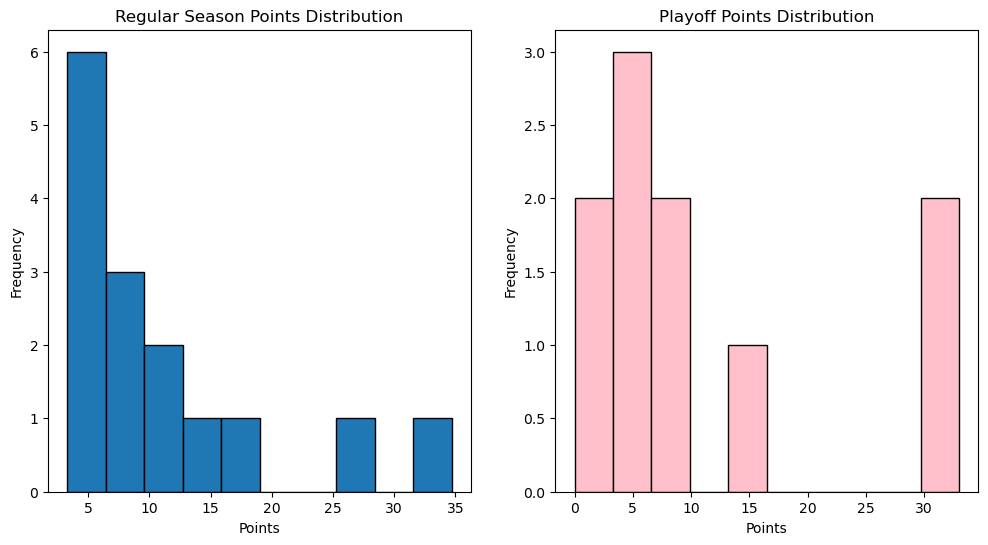

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].hist(sixersRegularSeason_Roster['PTS'], edgecolor='black')
ax[0].set_title('Regular Season Points Distribution')
ax[0].set_xlabel('Points')
ax[0].set_ylabel('Frequency')

ax[1].hist(sixersPlayoff_Roster['PTS'], edgecolor='black', color='pink')
ax[1].set_title('Playoff Points Distribution')
ax[1].set_xlabel('Points')
ax[1].set_ylabel('Frequency')


In the regular season, many players contributed moderately, with a few players having standout games.

In the playoffs, there seems to be a focus on a few key players performing well (such as the spike at 30 points), with most players contributing fewer points.

Text(0.5, 1.0, 'Playoff Points Boxplot')

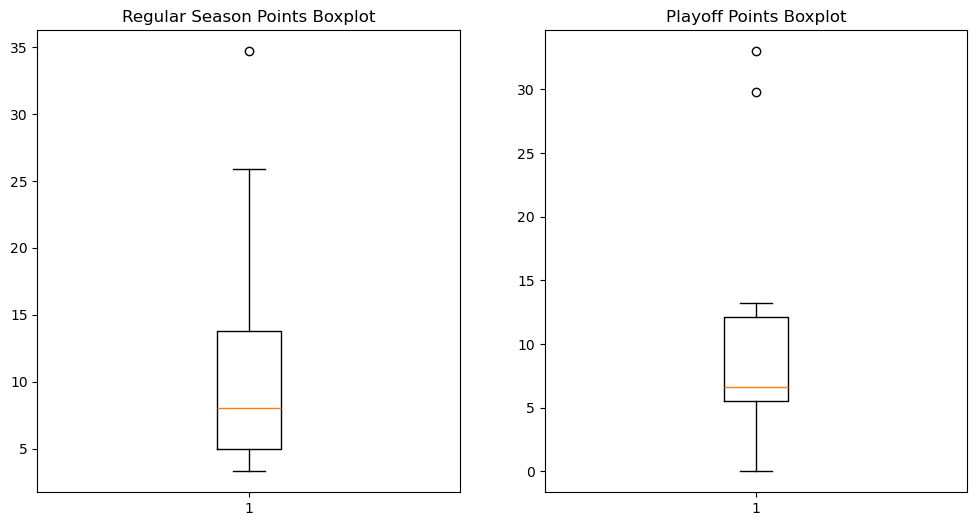

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].boxplot(sixersRegularSeason_Roster['PTS'])
ax[0].set_title('Regular Season Points Boxplot')

ax[1].boxplot(sixersPlayoff_Roster['PTS'])
ax[1].set_title('Playoff Points Boxplot')

In [46]:
sixersRegularSeason_Roster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 31 to 615
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  15 non-null     object 
 1   Pos     15 non-null     object 
 2   G       15 non-null     int64  
 3   GS      15 non-null     int64  
 4   MP      15 non-null     float64
 5   FG      15 non-null     float64
 6   FGA     15 non-null     float64
 7   FG%     15 non-null     float64
 8   3P      15 non-null     float64
 9   3PA     15 non-null     float64
 10  3P%     15 non-null     float64
 11  2P      15 non-null     float64
 12  2PA     15 non-null     float64
 13  2P%     15 non-null     float64
 14  eFG%    15 non-null     float64
 15  FT      15 non-null     float64
 16  FTA     15 non-null     float64
 17  FT%     15 non-null     float64
 18  ORB     15 non-null     float64
 19  DRB     15 non-null     float64
 20  TRB     15 non-null     float64
 21  AST     15 non-null     float64
 22  STL    

In [47]:
sixersPlayoff_Roster.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 11 to 165
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  10 non-null     object 
 1   Pos     10 non-null     object 
 2   G       10 non-null     int64  
 3   GS      10 non-null     int64  
 4   MP      10 non-null     float64
 5   FG      10 non-null     float64
 6   FGA     10 non-null     float64
 7   FG%     10 non-null     float64
 8   3P      10 non-null     float64
 9   3PA     10 non-null     float64
 10  3P%     10 non-null     float64
 11  2P      10 non-null     float64
 12  2PA     10 non-null     float64
 13  2P%     10 non-null     float64
 14  eFG%    10 non-null     float64
 15  FT      10 non-null     float64
 16  FTA     10 non-null     float64
 17  FT%     10 non-null     float64
 18  ORB     10 non-null     float64
 19  DRB     10 non-null     float64
 20  TRB     10 non-null     float64
 21  AST     10 non-null     float64
 22  STL    

In [48]:
sixersRegularSeason_Roster

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
31,Mo Bamba,C,57,17,13.0,1.7,3.5,0.490,0.4,1.1,...,0.680,1.4,2.8,4.2,0.7,0.4,1.1,0.7,1.8,4.4
50,Nicolas Batum,PF,57,38,25.9,2.0,4.4,0.456,1.2,3.1,...,0.714,1.2,3.0,4.2,2.2,0.8,0.6,0.7,1.8,5.5
142,Ricky Council IV,SG,32,0,9.0,1.7,3.5,0.482,0.4,1.0,...,0.746,0.4,1.0,1.4,0.5,0.3,0.0,0.2,0.5,5.4
145,Robert Covington,SF,26,3,16.1,1.5,3.4,0.449,0.7,1.8,...,0.875,1.1,2.3,3.4,0.7,1.3,0.6,0.4,1.9,4.5
186,Joel Embiid,C,39,39,33.6,11.5,21.8,0.529,1.4,3.6,...,0.883,2.4,8.6,11.0,5.6,1.2,1.7,3.8,2.9,34.7
274,Tobias Harris,PF,70,70,33.8,6.6,13.6,0.487,1.3,3.7,...,0.878,1.1,5.3,6.5,3.1,1.0,0.7,1.3,1.6,17.2
290,Buddy Hield,SG,32,14,25.8,4.4,10.4,0.426,2.6,6.6,...,0.923,0.8,2.3,3.2,3.0,0.8,0.3,1.3,2.1,12.2
393,Kyle Lowry,PG,23,20,28.4,2.6,5.9,0.444,1.6,3.9,...,0.848,0.4,2.4,2.8,4.6,0.9,0.3,1.4,2.3,8.0
411,KJ Martin,SF,58,2,12.3,1.6,2.9,0.544,0.1,0.4,...,0.538,0.7,1.5,2.2,0.9,0.3,0.2,0.5,1.7,3.7
415,Tyrese Maxey,PG,70,70,37.5,9.1,20.3,0.450,3.0,8.1,...,0.868,0.5,3.2,3.7,6.2,1.0,0.5,1.7,2.2,25.9


In [49]:
sixersPlayoff_Roster

,Player,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
11,Nicolas Batum,PF,6,0,28.3,2.0,4.8,0.414,1.5,3.7,...,0.625,1.5,4.3,5.8,1.3,0.2,0.8,0.8,2.2,6.3
46,Joel Embiid,C,6,6,41.3,9.8,22.2,0.444,2.2,6.5,...,0.859,3.2,7.7,10.8,5.7,1.2,1.5,4.2,3.3,33.0
68,Tobias Harris,PF,6,6,36.3,3.7,8.5,0.431,1.0,3.0,...,1.000,1.5,5.7,7.2,1.5,0.2,0.5,0.5,1.8,9.0
76,Buddy Hield,SG,4,0,12.8,1.8,4.3,0.412,1.5,3.3,...,1.000,0.5,0.8,1.3,0.5,0.0,0.3,0.5,1.0,5.5
115,Kyle Lowry,PG,6,6,29.2,1.8,5.3,0.344,1.3,4.0,...,0.800,1.0,2.5,3.5,4.0,1.0,0.7,0.7,3.8,7.0
119,Tyrese Maxey,PG,6,6,44.5,11.0,23.0,0.478,3.7,9.2,...,0.893,0.2,5.0,5.2,6.8,0.8,0.3,2.2,2.7,29.8
126,De'Anthony Melton,SG,1,0,7.0,0.0,2.0,0.000,0.0,2.0,...,0.000,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
151,Kelly Oubre Jr.,SF,6,6,37.3,5.2,10.7,0.484,1.5,3.8,...,0.727,1.5,2.5,4.0,1.7,1.8,1.2,1.3,4.0,13.2
152,Cameron Payne,PG,5,0,12.2,2.0,5.0,0.400,1.6,3.6,...,0.000,0.0,1.2,1.2,1.4,0.2,0.8,0.6,2.0,5.6
165,Paul Reed,C,6,0,7.2,0.7,1.5,0.444,0.0,0.0,...,0.500,1.5,1.2,2.7,0.3,0.2,0.5,0.5,1.2,1.5


In [53]:
regular_season_stats.corr()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
G,1.000000,0.642301,0.386097,0.309669,0.290028,0.545290,-0.056444,0.000462,-0.359617,0.363781,...,-0.176307,0.531333,0.365395,0.429259,0.039586,0.027157,0.416530,0.066839,0.395107,0.232351
GS,0.642301,1.000000,0.867178,0.727214,0.756550,0.057990,0.529141,0.581462,-0.069856,0.654516,...,0.357393,0.286742,0.627713,0.569162,0.600333,0.508663,0.412881,0.493308,0.501798,0.686688
MP,0.386097,0.867178,1.000000,0.799992,0.833797,-0.007803,0.724657,0.739784,0.094417,0.680139,...,0.643290,0.299829,0.691758,0.622908,0.821089,0.663821,0.428656,0.700345,0.724359,0.781406
FG,0.309669,0.727214,0.799992,1.000000,0.987935,0.192698,0.565295,0.582151,0.033932,0.964290,...,0.530037,0.415516,0.816850,0.750042,0.794491,0.475760,0.589843,0.899192,0.583412,0.994868
FGA,0.290028,0.756550,0.833797,0.987935,1.000000,0.064641,0.672508,0.693864,0.028041,0.915652,...,0.578156,0.320248,0.746393,0.669746,0.819821,0.518346,0.504262,0.858801,0.581876,0.981371
FG%,0.545290,0.057990,-0.007803,0.192698,0.064641,1.000000,-0.539807,-0.548160,-0.201129,0.394593,...,-0.296933,0.643802,0.444887,0.519732,-0.072679,-0.292515,0.525410,0.214187,0.205231,0.165959
3P,-0.056444,0.529141,0.724657,0.565295,0.672508,-0.539807,1.000000,0.992321,0.264805,0.327310,...,0.693555,-0.233479,0.177370,0.078899,0.768662,0.498313,-0.062083,0.450987,0.379404,0.568388
3PA,0.000462,0.581462,0.739784,0.582151,0.693864,-0.548160,0.992321,1.000000,0.170432,0.348030,...,0.657976,-0.225251,0.188084,0.089258,0.738717,0.524910,-0.056207,0.439555,0.398276,0.580808
3P%,-0.359617,-0.069856,0.094417,0.033932,0.028041,-0.201129,0.264805,0.170432,1.000000,-0.044664,...,0.390937,-0.011378,0.078795,0.058668,0.371243,-0.035152,0.141812,0.218912,-0.086046,0.074351
2P,0.363781,0.654516,0.680139,0.964290,0.915652,0.394593,0.327310,0.348030,-0.044664,1.000000,...,0.391093,0.551055,0.877629,0.833089,0.662278,0.383609,0.695795,0.887425,0.546834,0.957754


In [54]:
playoff_stats.corr()

,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
G,1.000000,0.520756,0.623208,0.450624,0.406856,0.902828,0.443454,0.307571,0.451130,0.420048,...,0.576561,0.540354,0.513142,0.561284,0.361829,0.481787,0.597968,0.414662,0.577150,0.436836
GS,0.520756,1.000000,0.877802,0.697845,0.704233,0.381695,0.507947,0.592757,0.294976,0.715400,...,0.610867,0.419355,0.662851,0.635815,0.706434,0.760886,0.426162,0.556532,0.773447,0.680199
MP,0.623208,0.877802,1.000000,0.831536,0.826652,0.530283,0.726754,0.769096,0.510220,0.808625,...,0.659322,0.476699,0.834928,0.784998,0.749021,0.687963,0.505646,0.676524,0.738470,0.809461
FG,0.450624,0.697845,0.831536,1.000000,0.995494,0.497595,0.852392,0.891823,0.392922,0.981303,...,0.492898,0.367382,0.758859,0.690465,0.866610,0.585044,0.420319,0.868522,0.526055,0.984594
FGA,0.406856,0.704233,0.826652,0.995494,1.000000,0.436362,0.837249,0.898453,0.372264,0.981489,...,0.470384,0.380553,0.780416,0.710610,0.889889,0.576700,0.424415,0.888838,0.528725,0.992149
FG%,0.902828,0.381695,0.530283,0.497595,0.436362,1.000000,0.536887,0.339492,0.593306,0.446394,...,0.620438,0.424328,0.389920,0.430693,0.258450,0.402546,0.533442,0.415367,0.403779,0.461846
3P,0.443454,0.507947,0.726754,0.852392,0.837249,0.536887,1.000000,0.959332,0.706175,0.735891,...,0.453109,0.026024,0.535811,0.415138,0.800057,0.415425,0.262214,0.638800,0.479110,0.823268
3PA,0.307571,0.592757,0.769096,0.891823,0.898453,0.339492,0.959332,1.000000,0.571236,0.802233,...,0.403275,0.065159,0.622080,0.492300,0.900752,0.454560,0.241707,0.707133,0.514860,0.880204
3P%,0.451130,0.294976,0.510220,0.392922,0.372264,0.593306,0.706175,0.571236,1.000000,0.250388,...,0.451006,0.016460,0.284095,0.221862,0.284143,0.273627,0.382269,0.267155,0.419395,0.379520
2P,0.420048,0.715400,0.808625,0.981303,0.981489,0.446394,0.735891,0.802233,0.250388,1.000000,...,0.471107,0.469548,0.787178,0.743639,0.828629,0.604462,0.451556,0.892943,0.505414,0.973322


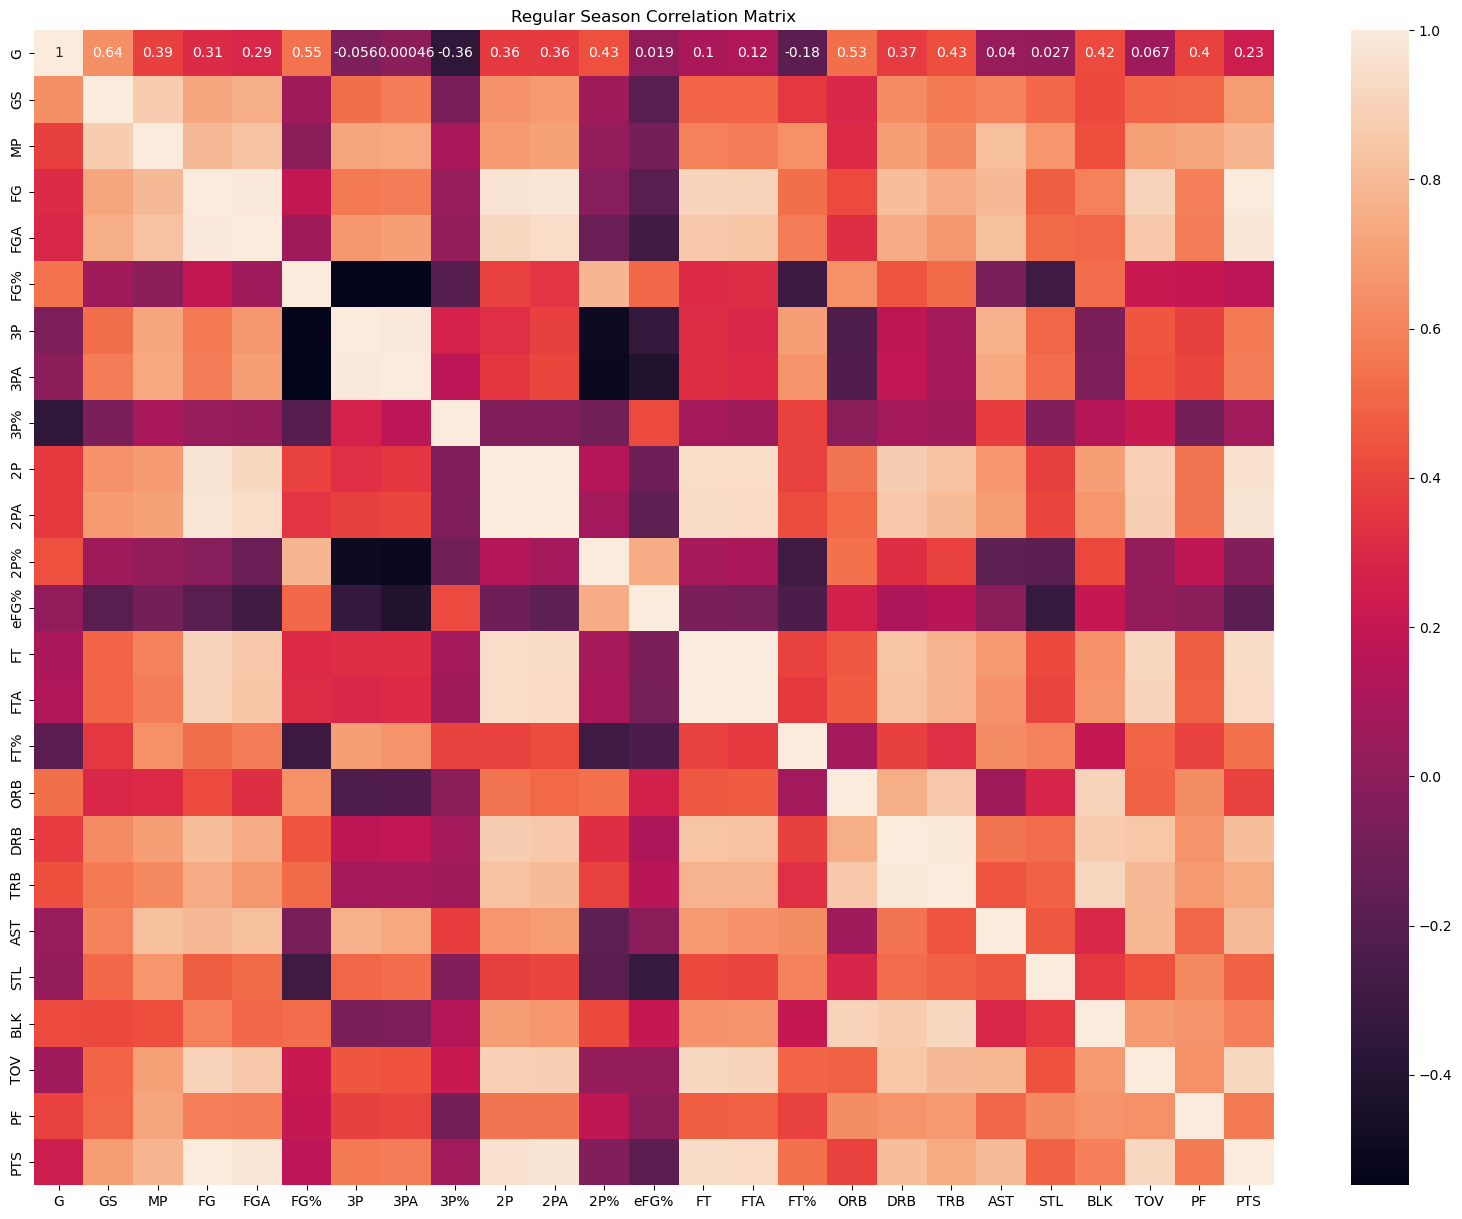

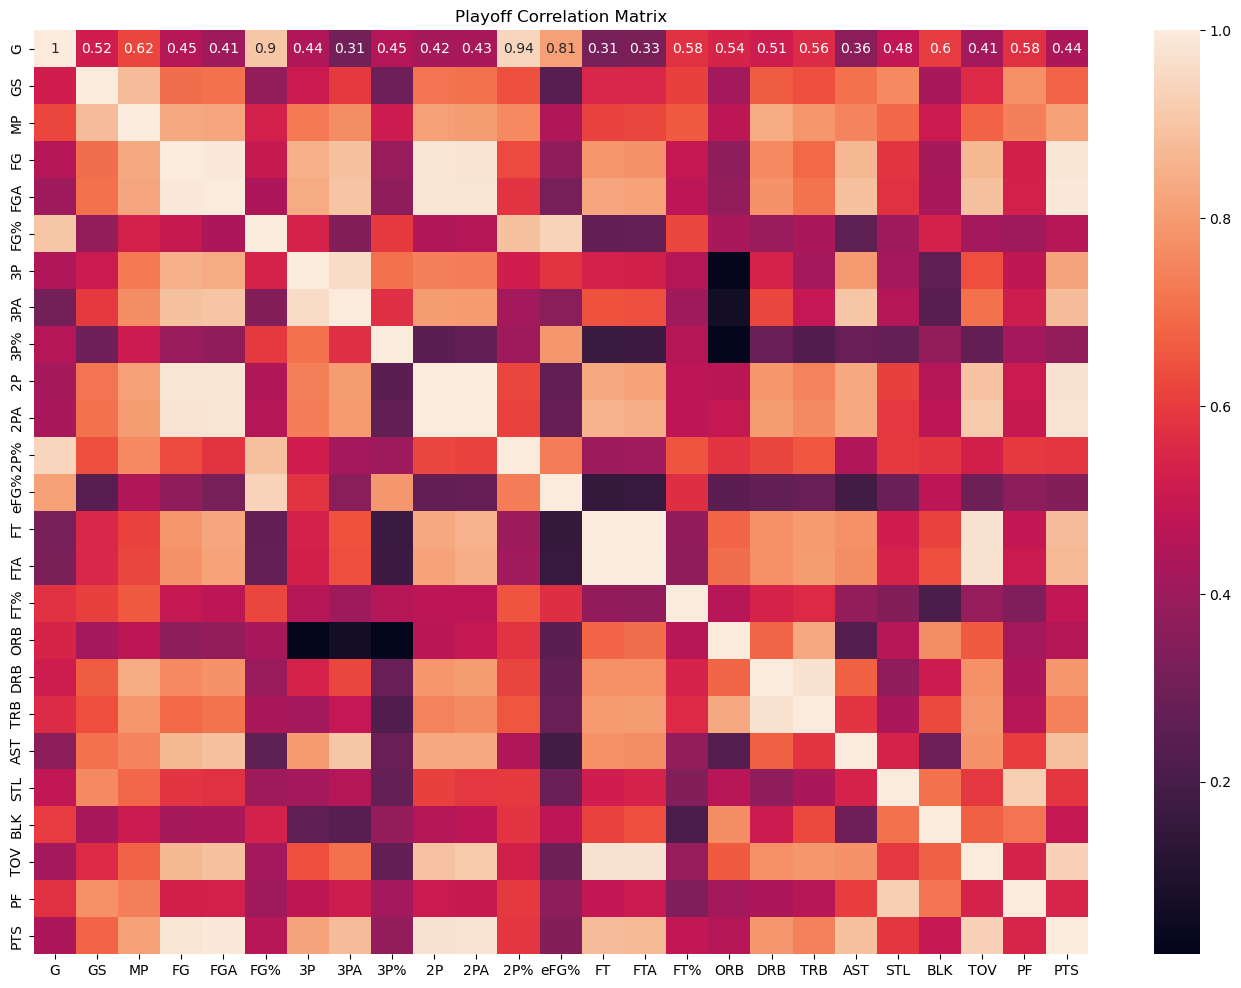

In [62]:
plt.figure(figsize=(20, 15))
sns.heatmap(regular_season_stats.corr(), annot=True)
plt.title('Regular Season Correlation Matrix')
plt.show()

plt.figure(figsize=(17, 12))
sns.heatmap(playoff_stats.corr(), annot=True)
plt.title('Playoff Correlation Matrix')
plt.show()

In [64]:
t_stat, p_value = ttest_ind(sixersRegularSeason_Roster['PTS'], sixersPlayoff_Roster['PTS'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in points between the regular season and playoffs.")
else:
    print("There is no significant difference in points between the regular season and playoffs.")

T-statistic: 0.025405912290158743, P-value: 0.9799503406165637
There is no significant difference in points between the regular season and playoffs.


# Hypothesis Testing for Defensive Metrics

[Text(0, 0, 'Regular Season'), Text(1, 0, 'Playoffs')]

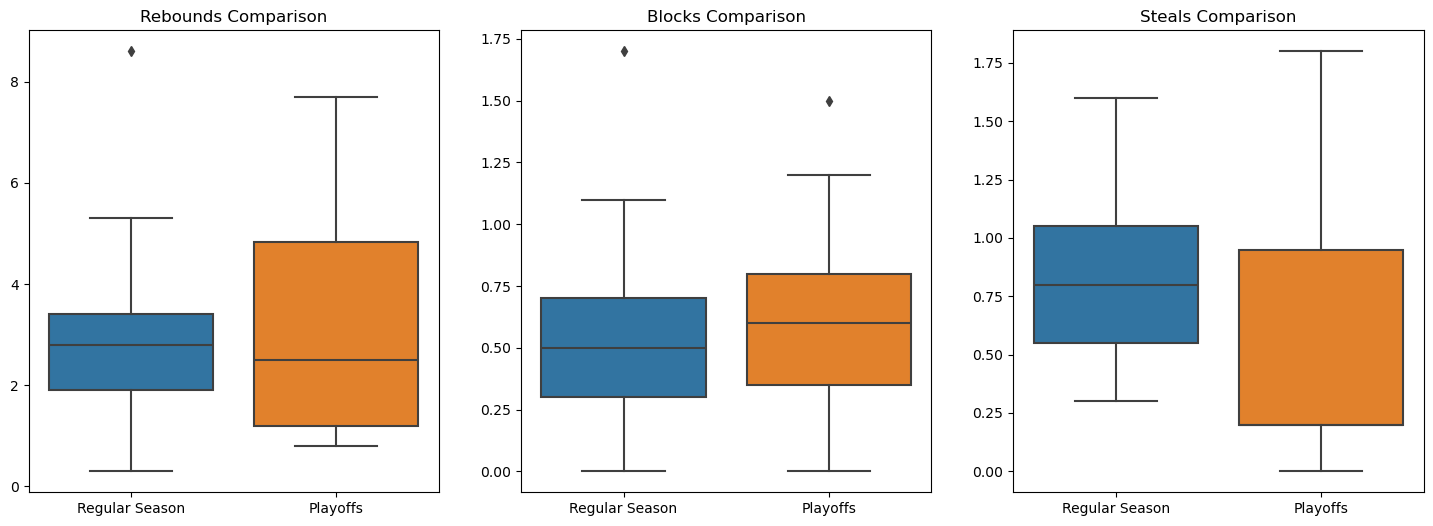

In [66]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Rebounds
sns.boxplot(data=[sixersRegularSeason_Roster['DRB'], sixersPlayoff_Roster['DRB']], ax=ax[0])
ax[0].set_title('Rebounds Comparison')
ax[0].set_xticklabels(['Regular Season', 'Playoffs'])

# Blocks
sns.boxplot(data=[sixersRegularSeason_Roster['BLK'], sixersPlayoff_Roster['BLK']], ax=ax[1])
ax[1].set_title('Blocks Comparison')
ax[1].set_xticklabels(['Regular Season', 'Playoffs'])

# Steals
sns.boxplot(data=[sixersRegularSeason_Roster['STL'], sixersPlayoff_Roster['STL']], ax=ax[2])
ax[2].set_title('Steals Comparison')
ax[2].set_xticklabels(['Regular Season', 'Playoffs'])

In [70]:
# T-test for rebounds
t_stat_reb, p_value_reb = ttest_ind(sixersRegularSeason_Roster['DRB'], sixersPlayoff_Roster['DRB'])
print(f"Defencive Rebounds: T-statistic: {t_stat_reb}, P-value: {p_value_reb}")
if p_value_reb < 0.05:
    print("There is a significant difference in Defencive Rebounds between the regular season and playoffs.")
else:
    print("There is no significant difference in Defencive Rebounds between the regular season and playoffs.")

# T-test for blocks
t_stat_blk, p_value_blk = ttest_ind(sixersRegularSeason_Roster['BLK'], sixersPlayoff_Roster['BLK'])
print(f"Blocks: T-statistic: {t_stat_blk}, P-value: {p_value_blk}")
if p_value_blk < 0.05:
    print("There is a significant difference in Blocks between the regular season and playoffs.")
else:
    print("There is no significant difference in Blocks between the regular season and playoffs.")

# T-test for steals
t_stat_stl, p_value_stl = ttest_ind(sixersRegularSeason_Roster['STL'], sixersPlayoff_Roster['STL'])
print(f"Steals: T-statistic: {t_stat_stl}, P-value: {p_value_stl}")
if p_value_stl < 0.05:
    print("There is a significant difference in Steals between the regular season and playoffs.")
else:
    print("There is no significant difference in Steals between the regular season and playoffs.")

Defencive Rebounds: T-statistic: -0.2780293499586769, P-value: 0.7834739029843136
There is no significant difference in Defencive Rebounds between the regular season and playoffs.
Blocks: T-statistic: -0.5477225575051649, P-value: 0.5891589381419473
There is no significant difference in Blocks between the regular season and playoffs.
Steals: T-statistic: 1.4233999493221625, P-value: 0.16804476675423413
There is no significant difference in Steals between the regular season and playoffs.
